# Tutorial

We are going to use [Simple Transformers](https://github.com/ThilinaRajapakse/simpletransformers) - an NLP library based on the [Transformers](https://github.com/huggingface/transformers) library by HuggingFace. Simple Transformers allows us to fine-tune Transformer models in a few lines of code.  

For the dataset, we are going to use the scraped Flowster Forum data.

### We are going to

- install Simple Transformers library
- select a pre-trained monolingual model
- load the dataset
- train/fine-tune our model
- evaluate the results of it
- save and load the model
- test the loaded model on a real example

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
cd /content/gdrive/MyDrive/Stemaway/Module4_notebook

/content/gdrive/MyDrive/Stemaway/Module4_notebook


https://bhishanpdl.github.io/Projects/Consumer_Complaints/e01_multiclass_clf_simpletransformers.html

https://text-machine-lab.github.io/blog/2020/bert-secrets/
https://mccormickml.com/2019/07/22/BERT-fine-tuning/

https://towardsdatascience.com/nlp-building-text-cleanup-and-preprocessing-pipeline-eba4095245a0

https://medium.com/analytics-vidhya/text-classification-with-bert-using-transformers-for-long-text-inputs-f54833994dfd



https://towardsdatascience.com/bert-text-classification-using-pytorch-723dfb8b6b5b

# Install Simple Transformers library 

In [10]:
# install simpletransformers
!pip install simpletransformers

# check installed version
!pip freeze | grep simpletransformers
# simpletransformers==0.28.2

     |████████████████████████████████| 215kB 13.2MB/s 
     |████████████████████████████████| 51kB 9.4MB/s 
     |████████████████████████████████| 2.0MB 11.6MB/s 
     |████████████████████████████████| 1.8MB 59.9MB/s 
     |████████████████████████████████| 317kB 54.9MB/s 
     |████████████████████████████████| 7.5MB 22.1MB/s 
     |████████████████████████████████| 81kB 12.9MB/s 
     |████████████████████████████████| 3.2MB 54.2MB/s 
     |████████████████████████████████| 1.2MB 46.4MB/s 
     |████████████████████████████████| 163kB 63.7MB/s 
     |████████████████████████████████| 133kB 63.4MB/s 
     |████████████████████████████████| 102kB 14.0MB/s 
     |████████████████████████████████| 890kB 33.2MB/s 
     |████████████████████████████████| 81kB 10.8MB/s 
     |████████████████████████████████| 4.5MB 48.8MB/s 
     |████████████████████████████████| 112kB 61.9MB/s 
     |████████████████████████████████| 71kB 11.3MB/s 
     |████████████████████████████████| 122kB 65.4MB/

simpletransformers==0.60.5


In [11]:
!pip install tokenizers==0.9.4

     |████████████████████████████████| 2.9MB 7.1MB/s 
  Found existing installation: tokenizers 0.10.0
    Uninstalling tokenizers-0.10.0:
      Successfully uninstalled tokenizers-0.10.0


# Select a pre-trained monolingual model

As mentioned above the Simple Transformers library is based on the Transformers library from HuggingFace. This enables us to use every pre-trained model provided in the [Transformers library](https://huggingface.co/transformers/pretrained_models.html) and all community-uploaded models. For a list that includes community-uploaded models, refer to [https://huggingface.co/models](https://huggingface.co/models).

We are going to use the `distilbert-base-german-cased` model. [DistilBERT is a small, fast, cheaper version of BERT](https://huggingface.co/transformers/model_doc/distilbert.html). It has 40% less parameters than `bert-base-uncased` and runs 60% faster while preserving over 95% of Bert’s performance.

# Load the dataset

In [12]:
import pandas as pd

In [15]:
!git clone https://github.com/YasaminAbbaszadegan/NLP_Forum_Recomendation_Engine.git
# cd /content/NLP_Forum_Recomendation_Engine/Dataset


fatal: destination path 'NLP_Forum_Recomendation_Engine' already exists and is not an empty directory.
[Errno 2] No such file or directory: '/content/NLP_Forum_Recomendation_Engine/Dataset'
/content/gdrive/MyDrive/Stemaway/Module4_notebook


In [17]:
cd /content/gdrive/MyDrive/Stemaway/Module4_notebook/NLP_Forum_Recomendation_Engine/Dataset


/content/gdrive/MyDrive/Stemaway/Module4_notebook/NLP_Forum_Recomendation_Engine/Dataset


In [18]:
ls

tudiabetes_20.csv


In [19]:

df=pd.read_csv('tudiabetes_20.csv',index_col=0)
df['Tags'] = df['Tags'].str.replace("[", "")
df['Tags'] = df['Tags'].str.replace("]", "")
df['Tags'] = df['Tags'].str.replace("'", "")
df['Post Replies'] = df['Post Replies'].str.replace("[", "")
df['Post Replies'] = df['Post Replies'].str.replace("]", "")
df['Post Replies'] = df['Post Replies'].str.replace("'", "")
df = df[df.Category != 'Social Clubs']
df = df[df.Category != 'TuDiabetes Website']
df = df[df.Category != 'Welcome']
df.head()

,Topic Title,Category,Tags,Leading Post,Post Replies,Created_at,Likes,Views,Replies
192,Type 1 Diabetes Resources,Type 1 and LADA,,Information on this page represents a sample o...,,"Dec 21, 2009 3:04 pm",2,9.2k,6
193,About the Type 1 and LADA category,Type 1 and LADA,,The Type 1 Diabetes and LADA category is inten...,,"Apr 14, 2015 5:51 pm",1,7.1k,1
194,Are you concerned about Covid-19 Vaccine might...,Type 1 and LADA,,I am wondering if others with multiple autoimm...,"Yeah. However, given that this is a pandemic, ...","Jan 14, 2021 6:40 am",32,349,17
195,Covid Vaccine - are you getting it?,Type 1 and LADA,,Hello!\nI wanted to get people who have type 1...,I am Type 2 but the question is just a relevan...,"Jan 2, 2021 8:39 pm",203,1.9k,120
196,Bolusing for pasta - big fail,Type 1 and LADA,,How do you guys bolus for pasta? I had some e...,"With pasta (any kind of spaghetti, light on th...","Jan 16, 2021 6:30 am",11,147,13


# new_df['comment_lead'] = df['Leading Post'] + ' ' + df['Post Replies']

In [20]:
my_categories = [ 'Type 1 and LADA',
'Type 2', 'Diabetes and Pregnancy', 'Community', 'Food',
'Treatment', 'Diabetes Technology']
new_df = pd.DataFrame()
new_df['comment_lead'] = df['Leading Post'] + ' ' + df['Post Replies']
new_df['Category'] = df['Category']
new_df['comment_lead'] = new_df['comment_lead'].apply(lambda x: str(x))
new_df['Category'] = new_df['Category'].apply(lambda x: str(x))


In [21]:
new_df.head()

,comment_lead,Category
192,Information on this page represents a sample o...,Type 1 and LADA
193,The Type 1 Diabetes and LADA category is inten...,Type 1 and LADA
194,I am wondering if others with multiple autoimm...,Type 1 and LADA
195,Hello!\nI wanted to get people who have type 1...,Type 1 and LADA
196,How do you guys bolus for pasta? I had some e...,Type 1 and LADA


In [22]:
# changing class names (text) to numbers (a necessity for simpletransformers library)
new_df['Category'] = new_df.apply(lambda x:  my_categories.index(x['Category']),axis=1)

In [23]:
new_df.head()

,comment_lead,Category
192,Information on this page represents a sample o...,0
193,The Type 1 Diabetes and LADA category is inten...,0
194,I am wondering if others with multiple autoimm...,0
195,Hello!\nI wanted to get people who have type 1...,0
196,How do you guys bolus for pasta? I had some e...,0


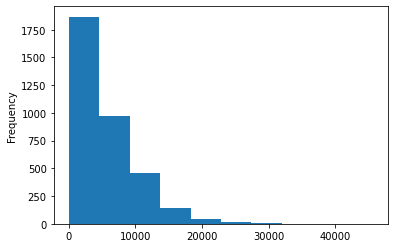

In [37]:
new_df['comment_lead'].astype(str).map(len).plot.hist()

# new_DF['comment_topic'] = df['Topic Title'] + ' ' + df['Tags'] + ' ' + df['Leading Post'] + ' ' + df['Post Replies']

In [49]:
my_categories = [ 'Type 1 and LADA',
'Type 2', 'Diabetes and Pregnancy', 'Community', 'Food',
'Treatment', 'Diabetes Technology']
new_DF = pd.DataFrame()
new_DF['comment_topic'] = df['Topic Title'] + ' ' + df['Tags'] + ' ' + df['Leading Post'] + ' ' + df['Post Replies']
new_DF['Category'] = df['Category']
new_DF['comment_topic'] = new_DF['comment_topic'].apply(lambda x: str(x))
new_DF['Category'] = new_DF['Category'].apply(lambda x: str(x))

In [51]:
# changing class names (text) to numbers (a necessity for simpletransformers library)
new_DF['Category'] = new_DF.apply(lambda x:  my_categories.index(x['Category']),axis=1)

In [52]:
new_DF.head()

,comment_topic,Category
192,Type 1 Diabetes Resources Information on this...,0
193,About the Type 1 and LADA category The Type 1...,0
194,Are you concerned about Covid-19 Vaccine might...,0
195,Covid Vaccine - are you getting it? Hello!\nI...,0
196,Bolusing for pasta - big fail How do you guys...,0


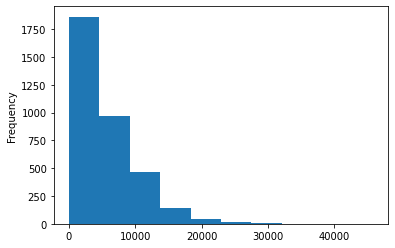

In [53]:
new_DF['comment_topic'].astype(str).map(len).plot.hist()

# train_df, test_df =new_df

In [41]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(new_df, test_size=0.10)

print('train shape: ',train_df.shape)
print('test shape: ',test_df.shape)

train shape:  (3156, 2)
test shape:  (351, 2)


# train_DF, test_DF= new_DF

In [54]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
train_DF, test_DF = train_test_split(new_DF, test_size=0.10)

print('train shape: ',train_DF.shape)
print('test shape: ',test_DF.shape)

train shape:  (3156, 2)
test shape:  (351, 2)


In [55]:
train_DF

,comment_topic,Category
1356,Type 1 increases chance of autistic children ...,2
1727,For Those Needing Their Diabuddies Sadly this...,3
3529,How long do you wait to replace a G6 sensor go...,6
1320,Repeated Miscarriages a/o Blood Clots? Please...,2
231,After over 20 years of being misdiagnosed it’s...,0
...,...,...
3359,Libre 2 USA availability Hello all. Abbott ha...,6
3039,"New to Tresiba, had major side effects Insulin...",5
2978,Experience with Glutathione IV or Nebulizer? ...,5
3355,High Altitude Alarm Insulin Pumps Has anyone e...,6


# Load pre-trained model

🚨 **If it doesn't work restart runtime**

In [58]:
from simpletransformers.classification import ClassificationModel


# model_bert

In [59]:

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 4}

# Create a ClassificationModel
model = ClassificationModel(
    "bert", "bert-base-cased",
    num_labels=7,
    args=train_args
)




Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

# model_RobBerta

In [60]:

# Create a ClassificationModel
model_rob = ClassificationModel(
    'roberta', 'roberta-base',
    num_labels=7,
    args=train_args
)


Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

# model_distil

In [62]:

# Create a ClassificationModel
model_distil = ClassificationModel(
    'distilbert', 'distilbert-base-cased',
    num_labels=7,
    args=train_args
)


Downloading:   0%|          | 0.00/411 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/263M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier

In [63]:
model_distil.args

ClassificationArgs(adam_epsilon=1e-08, best_model_dir='outputs/best_model', cache_dir='cache_dir/', config={}, cosine_schedule_num_cycles=0.5, custom_layer_parameters=[], custom_parameter_groups=[], dataloader_num_workers=0, do_lower_case=False, dynamic_quantize=False, early_stopping_consider_epochs=False, early_stopping_delta=0, early_stopping_metric='eval_loss', early_stopping_metric_minimize=True, early_stopping_patience=3, encoding=None, adafactor_eps=(1e-30, 0.001), adafactor_clip_threshold=1.0, adafactor_decay_rate=-0.8, adafactor_beta1=None, adafactor_scale_parameter=True, adafactor_relative_step=True, adafactor_warmup_init=True, eval_batch_size=8, evaluate_during_training=False, evaluate_during_training_silent=True, evaluate_during_training_steps=2000, evaluate_during_training_verbose=False, evaluate_each_epoch=True, fp16=False, gradient_accumulation_steps=1, learning_rate=4e-05, local_rank=-1, logging_steps=50, manual_seed=None, max_grad_norm=1.0, max_seq_length=128, model_nam

# model_xlnet

In [159]:

# Create a ClassificationModel
model_xlnet = ClassificationModel(
    'xlnet', 'xlnet-base-cased',
    num_labels=7,
    args=train_args
)

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.weight', 'sequence_summary.summary.bias', 'logits_proj.weight', 'logits_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

# Train model_Bert

In [28]:
# Train the model
model.train_model(train_df)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:446: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/3156 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/395 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


Running Epoch 1 of 4:   0%|          | 0/395 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/395 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/395 [00:00<?, ?it/s]

(1580, 0.7780939450829373)

In [29]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')
    
result, model_outputs, wrong_predictions = model.eval_model(test_df, f1=f1_multiclass, acc=accuracy_score)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:1026: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/351 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/44 [00:00<?, ?it/s]

In [30]:
result

{'acc': 0.6381766381766382,
 'eval_loss': 1.2563244906169446,
 'f1': 0.6381766381766382,
 'mcc': 0.5776409371836716}

### BERT train_DF

In [64]:
# Train the model
from timeit import default_timer as timer

# START MY TIMER
start = timer()
model.train_model(train_DF)
# STOP MY TIMER
elapsed_time_Bert_DF = timer() - start # in seconds
print(elapsed_time_Bert_DF)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:446: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/3156 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/395 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


Running Epoch 1 of 4:   0%|          | 0/395 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/395 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/395 [00:00<?, ?it/s]

338.5147990950004


In [68]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')
    
result_BERT_testDF, model_outputs, wrong_predictions = model.eval_model(test_DF, f1=f1_multiclass, acc=accuracy_score)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:1026: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/351 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/44 [00:00<?, ?it/s]

### BERT Test accuracy

In [69]:
result_BERT_testDF

{'acc': 0.7578347578347578,
 'eval_loss': 1.0601450608175418,
 'f1': 0.7578347578347578,
 'mcc': 0.7173137885264927}

In [70]:
result_BERT_trainDF, model_outputs, wrong_predictions = model.eval_model(train_DF, f1=f1_multiclass, acc=accuracy_score)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:1026: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/3156 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/395 [00:00<?, ?it/s]

### BERT Train accuracy

In [71]:
result_BERT_trainDF

{'acc': 0.9743346007604563,
 'eval_loss': 0.0941260117677901,
 'f1': 0.9743346007604563,
 'mcc': 0.9701202691587272}

### Save Pickle

In [77]:
import pickle
# save the classifier
with open('BERT.pkl', 'wb') as fid:
    pickle.dump(model, fid)    

# load it again
with open('BERT.pkl', 'rb') as fid:
    BERT_loaded = pickle.load(fid)

### Recomendation BERT

In [91]:
def recommendation_BERT(text):
  predictions, raw_outputs =BERT_loaded.predict([text])
  my_categories = [ 'Type 1 and LADA',
'Type 2', 'Diabetes and Pregnancy', 'Community', 'Food',
'Treatment', 'Diabetes Technology']
  print('https://forum.tudiabetes.org/c/'+my_categories[predictions[0]].lower().strip().replace(' ', '-'))
  return(my_categories[predictions[0]])


In [86]:
print(my_categories[predictions[0]])

Diabetes and Pregnancy


In [92]:
recommendation_BERT('I just got the news that I am pregnant, I am worried that my diabetes would harm the baby')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/diabetes-and-pregnancy


'Diabetes and Pregnancy'

In [93]:
recommendation_BERT('I have started a Dexcom Users Group and posted an introductory discussion. If you use a Dexcom CGM or are interested in learning about it, please join the group. There is a Dexcom group on another site with over 200 members. The site itself is smaller than DD. I think we should be able to have a good Dexcom group here on DD. The Dexcom is a great CGM and is scheduled to integrate with both the Animas and Omnipod pumps later this year. We need experienced users to help answer questions. Please join our Dexcom Users Group.')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/type-1-and-lada


'Type 1 and LADA'

In [94]:
recommendation_BERT('My uncle just found out he has diabetes. he is visiting me tomorrow and I dont know what to serve dinner? does anyone have any diabetes friendly recipe suggestions?')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/food


'Food'

In [96]:
recommendation_BERT('My guess is that the Dexcom group is no longer active, or if it does exist, is somewhere else. Richards post is nine years old, and the tudiabetes.com link above resolves to a different URL.')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/type-1-and-lada


'Type 1 and LADA'

In [97]:
recommendation_BERT('love Dexcom, I have been using it since September. I got G5.There are some things I like about it and some not yet.Also, Dexom just released newupdate for iPhone allowing almost full Apple Watch Integration, cant beat that')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/type-1-and-lada


'Type 1 and LADA'

In [98]:
recommendation_BERT('I have started a Dexcom Users Group and posted an introductory discussion. If you use a Dexcom CGM or are interested in learning about it, please join the group. There is a Dexcom group on another site with over 200 members. The site itself is smaller than DD. I think we should be able to have a good Dexcom group here on DD. The Dexcom is a great CGM and is scheduled to integrate with both the Animas and Omnipod pumps later this year. We need experienced users to help answer questions. Please join our Dexcom Users Group.')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/type-1-and-lada


'Type 1 and LADA'

In [131]:
recommendation_BERT('Good to know about the G6. I hope that it will become a good device for me eventually. The stress we have been under the last couple of weeks has really been messing up my glucose levels. It has just been too much.I hate to tell you but the China device is not reading LDL correctly for us. We just got hospital readings and my LDL here was much higher than at home. I sure wish I could take a statin. My LDL was 101 this morning although I had eaten breakfast. At home it was around 53. I am trying to stay calm, The medical folks are very nice and no one at all is bugging me about how much or how often I give insulin. Everybody is afraid of Covid.Thanks so much for your kind words cj.Marilyn')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/type-1-and-lada


'Type 1 and LADA'

In [135]:
recommendation_BERT('I am wondering if others with multiple autoimmune diseases are worried about injecting a vaccine that might wake up other auto immune diseases in our bodys. I have Type 1, Asthma and Thyroid Disease. I really dont want to deal with another disease. Are you having the same concerns or is this not an issues?')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/type-1-and-lada


'Type 1 and LADA'

In [145]:
# Diabetes and Pregnancy
#https://forum.tudiabetes.org/t/trying-to-get-my-a1c-down/27243

In [136]:
recommendation_BERT('So, Im new here to the whole website…just wanted to share my story…I’m a Type 1 with a perfectly healthy 4 year old son. Im trying to get my A1c to an acceptable level to have baby number 2! Any suggestions? My sugars were the best they’ve ever been while i was pregnant with Brandon (the 4 yr old)…he was a surprise…when i found out i was pregnant my a1c was a whopping 13. Needless to say we got EXTREMELY lucky with him. During my pregnancy my a1c never went over 6. it was amazing. I’m trying to get my lazy butt back to the gym, and start checking my sugar more…i was just wondering what everyone else was doing to prepare???')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/diabetes-and-pregnancy


'Diabetes and Pregnancy'

In [143]:
# treatment
#https://forum.tudiabetes.org/t/just-received-my-first-vials-of-lyumjev/83441

In [142]:
recommendation_BERT('I’m going to start using it tomorrow when I change out my Tandem reservoir. Hoping it will solve the problems I experience with Fiasp in this pump and maybe offer an incremental improvement over Fiasp in speed of adsorption and speed of activity decay. It was commercially released to distributors a week ago and it took me a bit of hunting to find a pharmacy that could get it for me. I’m sure that situation is improving by the day. My insurance PBM (ExpressScripts) has it on their site, but it’s not on my plan’s formulary and they won’t supply it at all - even with a doctor‘s reference. So I purchased it from Osco using Lilly’s $35 co-pay card. Otherwise I’d be SOL. List price is a little over $300/vial! And the name is terrible. it’s pronounced loom-gev but you’d never get that from the spelling. Since it’s new I got a lot of “huh, what is that?’ when I talked with the pharmacies.')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/diabetes-technology


'Diabetes Technology'

In [ ]:
#treatment
# https://forum.tudiabetes.org/t/pumping-symlin/9426/4

In [154]:
recommendation_BERT('Hi Fernando Happy birthday! I started on Symlin a week ago and so far so good. I’m not having any side effects as some people have reported. The dosing of Symlin is simple, but I’m still trying out various options for dosing my insulin along with the Symlin. (When to take it, how much to reduce it, whether to take a combo bolus). I couldn’t see being attached to two pumps. I just inject it with the Symlin pen. They are currently doing drug trials in the U.S. for a combination of Symlin and insulin so I think it is the next big step in treatment, but it will take awhile before it’s on the market. Have a great birthday!')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/treatment


'Treatment'

In [155]:
recommendation_BERT('Hi all, I’m considering loading up an old pump with symlin. I am already pumping insulin. My question: do people really think it is necessary to have TWO sites- one for insulin and one for symlin? Would it be possible to just bolus the symlin through the same site? (and yes, I know they aren’t SUPPOSED to be mixed…) Any thoughts would be appreciated. Thanks,Ruth')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/type-1-and-lada


'Type 1 and LADA'

#Train model_RobBerta

In [99]:
# Train the model
from timeit import default_timer as timer

# START MY TIMER
start = timer()
# Train the model
model_rob.train_model(train_DF)

# STOP MY TIMER
elapsed_time_rob_DF = timer() - start # in seconds
print(elapsed_time_rob_DF)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:446: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/3156 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/395 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


Running Epoch 1 of 4:   0%|          | 0/395 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/395 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/395 [00:00<?, ?it/s]

321.97131634700054


### RoBERT test_DF

In [100]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')
    
result_rob_testDF, model_outputs, wrong_predictions = model_rob.eval_model(test_DF, f1=f1_multiclass, acc=accuracy_score)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:1026: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/351 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/44 [00:00<?, ?it/s]

In [101]:
result_rob_testDF

{'acc': 0.811965811965812,
 'eval_loss': 0.8543232699475166,
 'f1': 0.811965811965812,
 'mcc': 0.7807505921206036}

In [103]:
result_rob_trainDF, model_outputs, wrong_predictions = model_rob.eval_model(train_DF, f1=f1_multiclass, acc=accuracy_score)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:1026: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/3156 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/395 [00:00<?, ?it/s]

### RoBERT train_DF

In [104]:
result_rob_trainDF

{'acc': 0.9569074778200254,
 'eval_loss': 0.15349957240226714,
 'f1': 0.9569074778200254,
 'mcc': 0.950012639427956}

### Save Pickle

In [105]:
import pickle
# save the classifier
with open('RoBERT.pkl', 'wb') as fid:
    pickle.dump(model_rob, fid)    

In [106]:

# load it again
with open('RoBERT.pkl', 'rb') as fid:
    RoBERT_loaded = pickle.load(fid)

### Recomendation Robert

In [108]:
def recommendation_RoBERT(text):
  predictions, raw_outputs =RoBERT_loaded.predict([text])
  my_categories = [ 'Type 1 and LADA',
'Type 2', 'Diabetes and Pregnancy', 'Community', 'Food',
'Treatment', 'Diabetes Technology']
  print('https://forum.tudiabetes.org/c/'+my_categories[predictions[0]].lower().strip().replace(' ', '-'))
  return(my_categories[predictions[0]])

In [109]:
recommendation_RoBERT('I just got the news that I am pregnant, I am worried that my diabetes would harm the baby')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/diabetes-and-pregnancy


'Diabetes and Pregnancy'

In [110]:
recommendation_RoBERT('I have started a Dexcom Users Group and posted an introductory discussion. If you use a Dexcom CGM or are interested in learning about it, please join the group. There is a Dexcom group on another site with over 200 members. The site itself is smaller than DD. I think we should be able to have a good Dexcom group here on DD. The Dexcom is a great CGM and is scheduled to integrate with both the Animas and Omnipod pumps later this year. We need experienced users to help answer questions. Please join our Dexcom Users Group.')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/diabetes-technology


'Diabetes Technology'

In [111]:
recommendation_RoBERT('My uncle just found out he has diabetes. he is visiting me tomorrow and I dont know what to serve dinner? does anyone have any diabetes friendly recipe suggestions?')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/food


'Food'

In [112]:
recommendation_RoBERT('My guess is that the Dexcom group is no longer active, or if it does exist, is somewhere else. Richards post is nine years old, and the tudiabetes.com link above resolves to a different URL.')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/type-1-and-lada


'Type 1 and LADA'

In [113]:
recommendation_RoBERT('I love Dexcom, I have been using it since September. I got G5.There are some things I like about it and some not yet.Also, Dexom just released newupdate for iPhone allowing almost full Apple Watch Integration, cant beat that')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/diabetes-technology


'Diabetes Technology'

In [114]:
recommendation_RoBERT('I have started a Dexcom Users Group and posted an introductory discussion. If you use a Dexcom CGM or are interested in learning about it, please join the group. There is a Dexcom group on another site with over 200 members. The site itself is smaller than DD. I think we should be able to have a good Dexcom group here on DD. The Dexcom is a great CGM and is scheduled to integrate with both the Animas and Omnipod pumps later this year. We need experienced users to help answer questions. Please join our Dexcom Users Group.')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/diabetes-technology


'Diabetes Technology'

In [130]:
recommendation_RoBERT('Good to know about the G6. I hope that it will become a good device for me eventually. The stress we have been under the last couple of weeks has really been messing up my glucose levels. It has just been too much.I hate to tell you but the China device is not reading LDL correctly for us. We just got hospital readings and my LDL here was much higher than at home. I sure wish I could take a statin. My LDL was 101 this morning although I had eaten breakfast. At home it was around 53. I am trying to stay calm, The medical folks are very nice and no one at all is bugging me about how much or how often I give insulin. Everybody is afraid of Covid.Thanks so much for your kind words cj.Marilyn')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/type-1-and-lada


'Type 1 and LADA'

In [134]:
recommendation_RoBERT('I am wondering if others with multiple autoimmune diseases are worried about injecting a vaccine that might wake up other auto immune diseases in our bodys. I have Type 1, Asthma and Thyroid Disease. I really dont want to deal with another disease. Are you having the same concerns or is this not an issues?')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/type-1-and-lada


'Type 1 and LADA'

In [144]:
# Diabetes and Pregnancy
#https://forum.tudiabetes.org/t/trying-to-get-my-a1c-down/27243

In [137]:
recommendation_RoBERT('So, Im new here to the whole website…just wanted to share my story…I’m a Type 1 with a perfectly healthy 4 year old son. Im trying to get my A1c to an acceptable level to have baby number 2! Any suggestions? My sugars were the best they’ve ever been while i was pregnant with Brandon (the 4 yr old)…he was a surprise…when i found out i was pregnant my a1c was a whopping 13. Needless to say we got EXTREMELY lucky with him. During my pregnancy my a1c never went over 6. it was amazing. I’m trying to get my lazy butt back to the gym, and start checking my sugar more…i was just wondering what everyone else was doing to prepare???')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/diabetes-and-pregnancy


'Diabetes and Pregnancy'

In [ ]:
# treatment
#https://forum.tudiabetes.org/t/just-received-my-first-vials-of-lyumjev/83441

In [141]:
recommendation_RoBERT('I’m going to start using it tomorrow when I change out my Tandem reservoir. Hoping it will solve the problems I experience with Fiasp in this pump and maybe offer an incremental improvement over Fiasp in speed of adsorption and speed of activity decay. It was commercially released to distributors a week ago and it took me a bit of hunting to find a pharmacy that could get it for me. I’m sure that situation is improving by the day. My insurance PBM (ExpressScripts) has it on their site, but it’s not on my plan’s formulary and they won’t supply it at all - even with a doctor‘s reference. So I purchased it from Osco using Lilly’s $35 co-pay card. Otherwise I’d be SOL. List price is a little over $300/vial! And the name is terrible. it’s pronounced loom-gev but you’d never get that from the spelling. Since it’s new I got a lot of “huh, what is that?’ when I talked with the pharmacies.')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/diabetes-technology


'Diabetes Technology'

In [ ]:
#treatment
# https://forum.tudiabetes.org/t/pumping-symlin/9426/4

In [151]:
recommendation_RoBERT('Hi Fernando Happy birthday! I started on Symlin a week ago and so far so good. I’m not having any side effects as some people have reported. The dosing of Symlin is simple, but I’m still trying out various options for dosing my insulin along with the Symlin. (When to take it, how much to reduce it, whether to take a combo bolus). I couldn’t see being attached to two pumps. I just inject it with the Symlin pen. They are currently doing drug trials in the U.S. for a combination of Symlin and insulin so I think it is the next big step in treatment, but it will take awhile before it’s on the market. Have a great birthday!')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/treatment


'Treatment'

In [152]:
recommendation_RoBERT('Hi all, I’m considering loading up an old pump with symlin. I am already pumping insulin. My question: do people really think it is necessary to have TWO sites- one for insulin and one for symlin? Would it be possible to just bolus the symlin through the same site? (and yes, I know they aren’t SUPPOSED to be mixed…) Any thoughts would be appreciated. Thanks,Ruth')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/type-1-and-lada


'Type 1 and LADA'

#Train_model_distil

In [115]:
from timeit import default_timer as timer

# START MY TIMER
start = timer()
# Train the model
model_distil.train_model(train_DF)

# STOP MY TIMER
elapsed_time_distil_DF = timer() - start # in seconds
print(elapsed_time_distil_DF)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:446: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/3156 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/395 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


Running Epoch 1 of 4:   0%|          | 0/395 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/395 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/395 [00:00<?, ?it/s]

199.7602975509999


### distil Test accuracy

In [116]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')
    
result_distil_testDF, model_outputs, wrong_predictions = model_distil.eval_model(test_DF, f1=f1_multiclass, acc=accuracy_score)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:1026: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/351 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/44 [00:00<?, ?it/s]

In [117]:
result_distil_testDF

{'acc': 0.7663817663817664,
 'eval_loss': 0.9566311886936257,
 'f1': 0.7663817663817665,
 'mcc': 0.7276831454553457}

### distil Train accuracy

In [118]:
result_distil_trainDF, model_outputs, wrong_predictions = model_distil.eval_model(train_DF, f1=f1_multiclass, acc=accuracy_score)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:1026: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/3156 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/395 [00:00<?, ?it/s]

In [119]:
result_distil_trainDF

{'acc': 0.9702154626108999,
 'eval_loss': 0.11741367938303494,
 'f1': 0.9702154626108999,
 'mcc': 0.9652965445857604}

### Save Pickle

In [120]:
import pickle
# save the classifier
with open('model_distil.pkl', 'wb') as fid:
    pickle.dump(model_distil, fid)   

In [121]:

# load it again
with open('model_distil.pkl', 'rb') as fid:
    distil_loaded = pickle.load(fid)

### Recomendation distil

In [122]:
def recommendation_distil(text):
  predictions, raw_outputs =distil_loaded.predict([text])
  my_categories = [ 'Type 1 and LADA',
'Type 2', 'Diabetes and Pregnancy', 'Community', 'Food',
'Treatment', 'Diabetes Technology']
  print('https://forum.tudiabetes.org/c/'+my_categories[predictions[0]].lower().strip().replace(' ', '-'))
  return(my_categories[predictions[0]])

In [123]:
recommendation_distil('I just got the news that I am pregnant, I am worried that my diabetes would harm the baby')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/diabetes-and-pregnancy


'Diabetes and Pregnancy'

In [124]:
recommendation_distil('I have started a Dexcom Users Group and posted an introductory discussion. If you use a Dexcom CGM or are interested in learning about it, please join the group. There is a Dexcom group on another site with over 200 members. The site itself is smaller than DD. I think we should be able to have a good Dexcom group here on DD. The Dexcom is a great CGM and is scheduled to integrate with both the Animas and Omnipod pumps later this year. We need experienced users to help answer questions. Please join our Dexcom Users Group.')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/diabetes-technology


'Diabetes Technology'

In [125]:
recommendation_distil('My uncle just found out he has diabetes. he is visiting me tomorrow and I dont know what to serve dinner? does anyone have any diabetes friendly recipe suggestions?')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/food


'Food'

In [126]:
recommendation_distil('My guess is that the Dexcom group is no longer active, or if it does exist, is somewhere else. Richards post is nine years old, and the tudiabetes.com link above resolves to a different URL.')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/type-1-and-lada


'Type 1 and LADA'

In [127]:
recommendation_distil('I love Dexcom, I have been using it since September. I got G5.There are some things I like about it and some not yet.Also, Dexom just released newupdate for iPhone allowing almost full Apple Watch Integration, cant beat that')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/diabetes-technology


'Diabetes Technology'

In [128]:
recommendation_distil('I have started a Dexcom Users Group and posted an introductory discussion. If you use a Dexcom CGM or are interested in learning about it, please join the group. There is a Dexcom group on another site with over 200 members. The site itself is smaller than DD. I think we should be able to have a good Dexcom group here on DD. The Dexcom is a great CGM and is scheduled to integrate with both the Animas and Omnipod pumps later this year. We need experienced users to help answer questions. Please join our Dexcom Users Group.')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/diabetes-technology


'Diabetes Technology'

In [129]:
recommendation_distil('Good to know about the G6. I hope that it will become a good device for me eventually. The stress we have been under the last couple of weeks has really been messing up my glucose levels. It has just been too much.I hate to tell you but the China device is not reading LDL correctly for us. We just got hospital readings and my LDL here was much higher than at home. I sure wish I could take a statin. My LDL was 101 this morning although I had eaten breakfast. At home it was around 53. I am trying to stay calm, The medical folks are very nice and no one at all is bugging me about how much or how often I give insulin. Everybody is afraid of Covid.Thanks so much for your kind words cj.Marilyn')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/type-1-and-lada


'Type 1 and LADA'

In [133]:
recommendation_distil('I am wondering if others with multiple autoimmune diseases are worried about injecting a vaccine that might wake up other auto immune diseases in our bodys. I have Type 1, Asthma and Thyroid Disease. I really dont want to deal with another disease. Are you having the same concerns or is this not an issues?')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/type-1-and-lada


'Type 1 and LADA'

In [139]:
# Diabetes and Pregnancy
#https://forum.tudiabetes.org/t/trying-to-get-my-a1c-down/27243

In [138]:
recommendation_distil('So, Im new here to the whole website…just wanted to share my story…I’m a Type 1 with a perfectly healthy 4 year old son. Im trying to get my A1c to an acceptable level to have baby number 2! Any suggestions? My sugars were the best they’ve ever been while i was pregnant with Brandon (the 4 yr old)…he was a surprise…when i found out i was pregnant my a1c was a whopping 13. Needless to say we got EXTREMELY lucky with him. During my pregnancy my a1c never went over 6. it was amazing. I’m trying to get my lazy butt back to the gym, and start checking my sugar more…i was just wondering what everyone else was doing to prepare???')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/diabetes-and-pregnancy


'Diabetes and Pregnancy'

In [ ]:
# treatment
#https://forum.tudiabetes.org/t/just-received-my-first-vials-of-lyumjev/83441

In [140]:
recommendation_distil('I’m going to start using it tomorrow when I change out my Tandem reservoir. Hoping it will solve the problems I experience with Fiasp in this pump and maybe offer an incremental improvement over Fiasp in speed of adsorption and speed of activity decay. It was commercially released to distributors a week ago and it took me a bit of hunting to find a pharmacy that could get it for me. I’m sure that situation is improving by the day. My insurance PBM (ExpressScripts) has it on their site, but it’s not on my plan’s formulary and they won’t supply it at all - even with a doctor‘s reference. So I purchased it from Osco using Lilly’s $35 co-pay card. Otherwise I’d be SOL. List price is a little over $300/vial! And the name is terrible. it’s pronounced loom-gev but you’d never get that from the spelling. Since it’s new I got a lot of “huh, what is that?’ when I talked with the pharmacies.')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/type-1-and-lada


'Type 1 and LADA'

In [150]:
#treatment
# https://forum.tudiabetes.org/t/pumping-symlin/9426/4

In [148]:
recommendation_distil('Hi Fernando Happy birthday! I started on Symlin a week ago and so far so good. I’m not having any side effects as some people have reported. The dosing of Symlin is simple, but I’m still trying out various options for dosing my insulin along with the Symlin. (When to take it, how much to reduce it, whether to take a combo bolus). I couldn’t see being attached to two pumps. I just inject it with the Symlin pen. They are currently doing drug trials in the U.S. for a combination of Symlin and insulin so I think it is the next big step in treatment, but it will take awhile before it’s on the market. Have a great birthday!')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/treatment


'Treatment'

In [149]:
recommendation_distil('Hi all, I’m considering loading up an old pump with symlin. I am already pumping insulin. My question: do people really think it is necessary to have TWO sites- one for insulin and one for symlin? Would it be possible to just bolus the symlin through the same site? (and yes, I know they aren’t SUPPOSED to be mixed…) Any thoughts would be appreciated. Thanks,Ruth')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/type-1-and-lada


'Type 1 and LADA'

In [157]:
# tech
# https://forum.tudiabetes.org/t/iphone-8plus-and-g6-clarity-and-share-apps/86009

In [156]:
recommendation_distil('Has anyone had difficulty with the referenced iphone and Dexcom ? Consistently loses bluetooth connectivity. Any troubleshooting or solutions much appreciated.')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/diabetes-technology


'Diabetes Technology'

#Train_model_xlnet

In [160]:
from timeit import default_timer as timer

# START MY TIMER
start = timer()
# Train the model
model_xlnet.train_model(train_DF)

# STOP MY TIMER
elapsed_time_xlnet_DF = timer() - start # in seconds
print(elapsed_time_xlnet_DF)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:446: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/3156 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/395 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


Running Epoch 1 of 4:   0%|          | 0/395 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/395 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/395 [00:00<?, ?it/s]

356.6547381929995


### xlnet Test accuracy

In [161]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')
    
result_xlnet_testDF, model_outputs, wrong_predictions = model_xlnet.eval_model(test_DF, f1=f1_multiclass, acc=accuracy_score)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:1026: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/351 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/44 [00:00<?, ?it/s]

In [162]:
result_xlnet_testDF

{'acc': 0.792022792022792,
 'eval_loss': 1.024962658226617,
 'f1': 0.792022792022792,
 'mcc': 0.7570638617066169}

### xlnet Train accuracy

In [163]:
result_xlnet_trainDF, model_outputs, wrong_predictions = model_xlnet.eval_model(train_DF, f1=f1_multiclass, acc=accuracy_score)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:1026: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/3156 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/395 [00:00<?, ?it/s]

In [164]:
result_xlnet_trainDF

{'acc': 0.9692648922686945,
 'eval_loss': 0.11736495716046377,
 'f1': 0.9692648922686945,
 'mcc': 0.9642299998155333}

### Save Pickle

In [165]:
import pickle
# save the classifier
with open('xlnet.pkl', 'wb') as fid:
    pickle.dump(model_xlnet, fid)   

In [166]:

# load it again
with open('xlnet.pkl', 'rb') as fid:
    xlnet_loaded = pickle.load(fid)

### Recomendation xlnet

In [167]:
def recommendation_xlnet(text):
  predictions, raw_outputs =xlnet_loaded.predict([text])
  my_categories = [ 'Type 1 and LADA',
'Type 2', 'Diabetes and Pregnancy', 'Community', 'Food',
'Treatment', 'Diabetes Technology']
  print('https://forum.tudiabetes.org/c/'+my_categories[predictions[0]].lower().strip().replace(' ', '-'))
  return(my_categories[predictions[0]])

In [168]:
recommendation_xlnet('I just got the news that I am pregnant, I am worried that my diabetes would harm the baby')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/diabetes-and-pregnancy


'Diabetes and Pregnancy'

In [169]:
recommendation_xlnet('I have started a Dexcom Users Group and posted an introductory discussion. If you use a Dexcom CGM or are interested in learning about it, please join the group. There is a Dexcom group on another site with over 200 members. The site itself is smaller than DD. I think we should be able to have a good Dexcom group here on DD. The Dexcom is a great CGM and is scheduled to integrate with both the Animas and Omnipod pumps later this year. We need experienced users to help answer questions. Please join our Dexcom Users Group.')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/diabetes-technology


'Diabetes Technology'

In [170]:
recommendation_xlnet('My uncle just found out he has diabetes. he is visiting me tomorrow and I dont know what to serve dinner? does anyone have any diabetes friendly recipe suggestions?')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/food


'Food'

In [171]:
recommendation_xlnet('My guess is that the Dexcom group is no longer active, or if it does exist, is somewhere else. Richards post is nine years old, and the tudiabetes.com link above resolves to a different URL.')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/type-1-and-lada


'Type 1 and LADA'

In [172]:
recommendation_xlnet('I love Dexcom, I have been using it since September. I got G5.There are some things I like about it and some not yet.Also, Dexom just released newupdate for iPhone allowing almost full Apple Watch Integration, cant beat that')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/diabetes-technology


'Diabetes Technology'

In [173]:
recommendation_xlnet('I have started a Dexcom Users Group and posted an introductory discussion. If you use a Dexcom CGM or are interested in learning about it, please join the group. There is a Dexcom group on another site with over 200 members. The site itself is smaller than DD. I think we should be able to have a good Dexcom group here on DD. The Dexcom is a great CGM and is scheduled to integrate with both the Animas and Omnipod pumps later this year. We need experienced users to help answer questions. Please join our Dexcom Users Group.')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/diabetes-technology


'Diabetes Technology'

In [174]:
recommendation_xlnet('Good to know about the G6. I hope that it will become a good device for me eventually. The stress we have been under the last couple of weeks has really been messing up my glucose levels. It has just been too much.I hate to tell you but the China device is not reading LDL correctly for us. We just got hospital readings and my LDL here was much higher than at home. I sure wish I could take a statin. My LDL was 101 this morning although I had eaten breakfast. At home it was around 53. I am trying to stay calm, The medical folks are very nice and no one at all is bugging me about how much or how often I give insulin. Everybody is afraid of Covid.Thanks so much for your kind words cj.Marilyn')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/type-1-and-lada


'Type 1 and LADA'

In [175]:
recommendation_xlnet('I am wondering if others with multiple autoimmune diseases are worried about injecting a vaccine that might wake up other auto immune diseases in our bodys. I have Type 1, Asthma and Thyroid Disease. I really dont want to deal with another disease. Are you having the same concerns or is this not an issues?')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/type-1-and-lada


'Type 1 and LADA'

In [ ]:
# Diabetes and Pregnancy
#https://forum.tudiabetes.org/t/trying-to-get-my-a1c-down/27243

In [176]:
recommendation_xlnet('So, Im new here to the whole website…just wanted to share my story…I’m a Type 1 with a perfectly healthy 4 year old son. Im trying to get my A1c to an acceptable level to have baby number 2! Any suggestions? My sugars were the best they’ve ever been while i was pregnant with Brandon (the 4 yr old)…he was a surprise…when i found out i was pregnant my a1c was a whopping 13. Needless to say we got EXTREMELY lucky with him. During my pregnancy my a1c never went over 6. it was amazing. I’m trying to get my lazy butt back to the gym, and start checking my sugar more…i was just wondering what everyone else was doing to prepare???')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/diabetes-and-pregnancy


'Diabetes and Pregnancy'

In [ ]:
# treatment
#https://forum.tudiabetes.org/t/just-received-my-first-vials-of-lyumjev/83441

In [177]:
recommendation_xlnet('I’m going to start using it tomorrow when I change out my Tandem reservoir. Hoping it will solve the problems I experience with Fiasp in this pump and maybe offer an incremental improvement over Fiasp in speed of adsorption and speed of activity decay. It was commercially released to distributors a week ago and it took me a bit of hunting to find a pharmacy that could get it for me. I’m sure that situation is improving by the day. My insurance PBM (ExpressScripts) has it on their site, but it’s not on my plan’s formulary and they won’t supply it at all - even with a doctor‘s reference. So I purchased it from Osco using Lilly’s $35 co-pay card. Otherwise I’d be SOL. List price is a little over $300/vial! And the name is terrible. it’s pronounced loom-gev but you’d never get that from the spelling. Since it’s new I got a lot of “huh, what is that?’ when I talked with the pharmacies.')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/treatment


'Treatment'

In [ ]:
#treatment
# https://forum.tudiabetes.org/t/pumping-symlin/9426/4

In [178]:
recommendation_xlnet('Hi Fernando Happy birthday! I started on Symlin a week ago and so far so good. I’m not having any side effects as some people have reported. The dosing of Symlin is simple, but I’m still trying out various options for dosing my insulin along with the Symlin. (When to take it, how much to reduce it, whether to take a combo bolus). I couldn’t see being attached to two pumps. I just inject it with the Symlin pen. They are currently doing drug trials in the U.S. for a combination of Symlin and insulin so I think it is the next big step in treatment, but it will take awhile before it’s on the market. Have a great birthday!')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/treatment


'Treatment'

In [179]:
recommendation_xlnet('Hi all, I’m considering loading up an old pump with symlin. I am already pumping insulin. My question: do people really think it is necessary to have TWO sites- one for insulin and one for symlin? Would it be possible to just bolus the symlin through the same site? (and yes, I know they aren’t SUPPOSED to be mixed…) Any thoughts would be appreciated. Thanks,Ruth')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/type-1-and-lada


'Type 1 and LADA'

In [ ]:
# tech
# https://forum.tudiabetes.org/t/iphone-8plus-and-g6-clarity-and-share-apps/86009

In [180]:
recommendation_xlnet('Has anyone had difficulty with the referenced iphone and Dexcom ? Consistently loses bluetooth connectivity. Any troubleshooting or solutions much appreciated.')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://forum.tudiabetes.org/c/type-1-and-lada


'Type 1 and LADA'

# Final Result

In [ ]:
import pandas as pd

results = pd.DataFrame({'Model': ['BERT', 'RoBerta', 'Distil_BERT','xlnet'],
                         'time':[elapsed_time_Bert_DF,elapsed_time_rob_DF,elapsed_time_distil_DF,elapsed_time_xlnet_DF],
                         'Test_DF_acc':[result_BERT_testDF['acc'],result_rob_testDF['acc'],result_distil_testDF['acc'],result_xlnet_testDF['acc']],
                         'Train_DF_acc':[result_BERT_trainDF['acc'],result_rob_trainDF['acc'],result_distil_trainDF['acc'],result_xlnet_trainDF['acc']],
                         'Test_DF_f1': [result_BERT_testDF['f1'],result_rob_testDF['f1'],result_distil_testDF['f1'],result_xlnet_testDF['f1']],
                         'Train_DF_f1':[result_BERT_trainDF['f1'],result_rob_trainDF['f1'],result_distil_trainDF['f1'],result_xlnet_trainDF['f1']],
                         'Test_DF_eval_loss': [result_BERT_testDF['eval_loss'],result_rob_testDF['eval_loss'],result_distil_testDF['eval_loss'],result_xlnet_testDF['eval_loss']],
                         'Train_DF_eval_loss':[result_BERT_trainDF['eval_loss'],result_rob_trainDF['eval_loss'],result_distil_trainDF['eval_loss'],result_xlnet_trainDF['eval_loss']],
                         'Test_DF_mcc': [result_BERT_testDF['mcc'],result_rob_testDF['mcc'],result_distil_testDF['mcc'],result_xlnet_testDF['mcc']],
                         'Train_DF_mcc':[result_BERT_trainDF['mcc'],result_rob_trainDF['mcc'],result_distil_trainDF['mcc'],result_xlnet_trainDF['mcc']],
                        
                        })
results.set_index('Model')

In [190]:
results.sort_values(by='Test_DF_acc',ascending=False)

,Model,time,Test_DF_acc,Train_DF_acc,Test_DF_f1,Train_DF_f1,Test_DF_eval_loss,Train_DF_eval_loss,Test_DF_mcc,Train_DF_mcc
1,RoBerta,321.971316,0.811966,0.956907,0.811966,0.956907,0.854323,0.153500,0.780751,0.950013
3,xlnet,356.654738,0.792023,0.969265,0.792023,0.969265,1.024963,0.117365,0.757064,0.964230
2,Distil_BERT,199.760298,0.766382,0.970215,0.766382,0.970215,0.956631,0.117414,0.727683,0.965297
0,BERT,338.514799,0.757835,0.974335,0.757835,0.974335,1.060145,0.094126,0.717314,0.970120
